In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
from daphne import daphne
from bbvi import BBVI

In [2]:
def load_graph(num):
    return daphne(['graph', '-i', '../a4/programs/{}.daphne'.format(num)])

def plot_elbos(elbos, path):
    plt.figure(figsize=(15,5))
    plt.plot(elbos)
    plt.grid(axis='y')
    plt.xlabel("Step")
    plt.ylabel("ELBO")
    plt.savefig(path)    

# Program 1

In [3]:
bbvi = BBVI(load_graph(1), lr=5e-2)
T = 1000
L = 500

start = time.time()
samples, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

samples = np.array(samples)
weights = np.exp(np.array(log_weights))
elbos = np.array(elbos)
mean = np.average(samples, weights=weights)

print("Number of samples: {}".format(T*L))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of mu: {:.3f}".format(mean))
print("Variational distribution: ", list(bbvi.Q.values())[0])

100%|██████████| 1000/1000 [03:05<00:00,  5.40it/s, ELBO=tensor(-8.2394)]


Number of samples: 500000
Sampling time: 185 seconds
Posterior mean of mu: 7.223
Variational distribution:  Normal(loc: 7.249997138977051, scale: 0.9128708839416504)


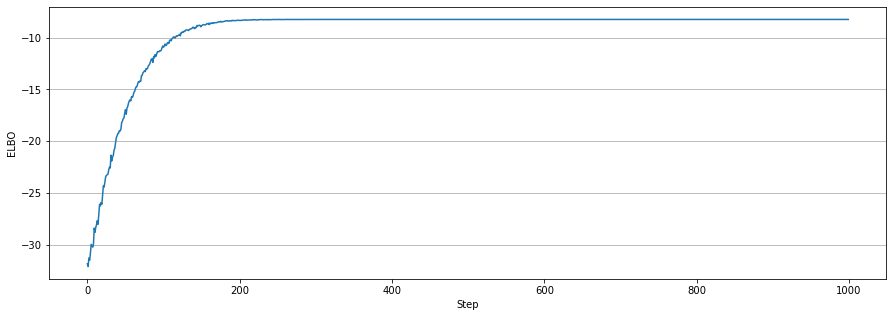

In [4]:
plot_elbos(elbos, "figs/p1_elbos.png")

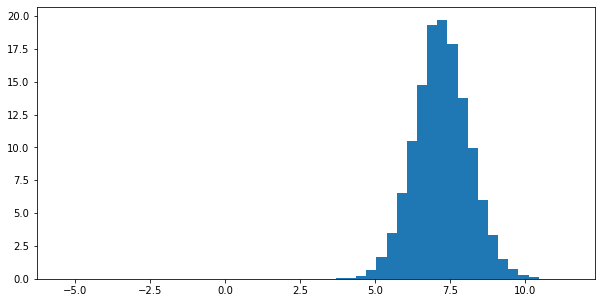

In [5]:
plt.figure(figsize=(10,5))
plt.hist(samples, weights=weights, bins=50)
plt.savefig("figs/p1_hist.png")

# Program 2

In [6]:
bbvi = BBVI(load_graph(2), lr=5e-2)
T = 2000
L = 500

start = time.time()
samples, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
weights = np.exp(np.array(log_weights))
slope_mean = np.average(samples[:, 0], weights=weights)
bias_mean = np.average(samples[:, 1], weights=weights)

print("Number of samples: {}".format(T*L))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of slope: {:.3f}".format(slope_mean))
print("Posterior mean of bias: {:.3f}".format(bias_mean))

100%|██████████| 2000/2000 [15:59<00:00,  2.08it/s, ELBO=tensor(-13.8991)]


Number of samples: 1000000
Sampling time: 961 seconds
Posterior mean of slope: 2.146
Posterior mean of bias: -0.506


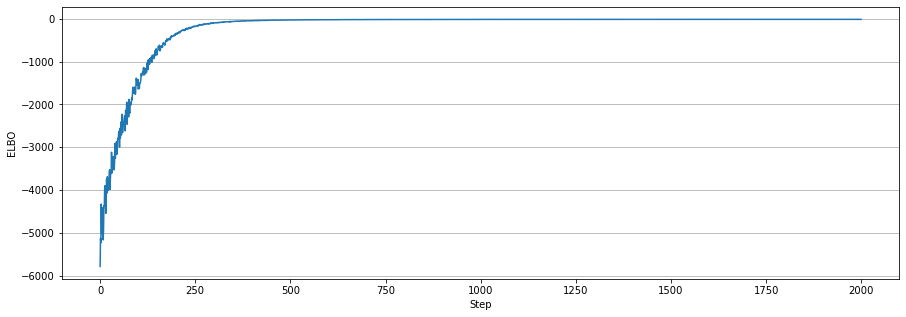

In [7]:
plot_elbos(elbos, "figs/p2_elbos.png")

# Program 3

In [3]:
bbvi = BBVI(load_graph(3), lr=1e-2)
T = 1000
L = 300

start = time.time()
samples, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

samples = np.array(samples, dtype=float)
weights = np.exp(np.array(log_weights))

print("Number of samples: {}".format(T*L))
print("Sampling time: {} seconds".format(int(end-start)))
print("P(z[1] == z[2] | data) = {:.3f}".format(np.average(samples, weights=weights)))

  1%|▏         | 13/1000 [00:11<14:53,  1.10it/s, ELBO=tensor(-730921.1250)]


KeyboardInterrupt: 

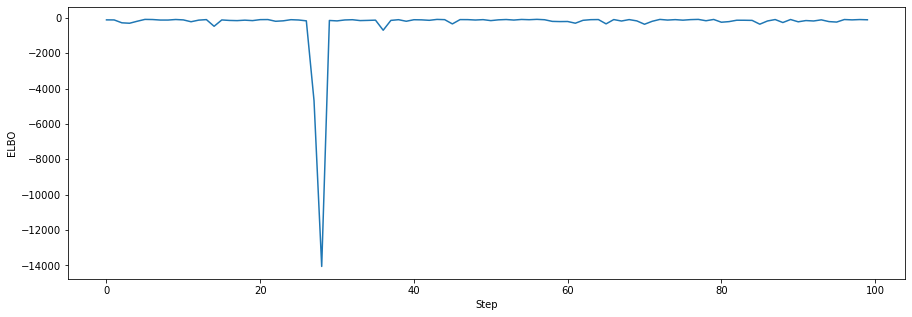

In [11]:
plt.figure(figsize=(15,5))
plt.plot(np.array(elbos))
#plt.yscale('symlog')
plt.xlabel("Step")
plt.ylabel("ELBO")
plt.savefig("figs/p3_elbos.png")

# Program 4

In [14]:
bbvi = BBVI(load_graph(4), lr=5e-2)
T = 500
L = 100

start = time.time()
rets, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

100%|██████████| 500/500 [50:50<00:00,  6.10s/it, ELBO=tensor(-456.2404)]


In [15]:
samples = {'W0': [], 'b0': [], 'W1': [], 'b1': []}
for i in range(T*L):
    samples['W0'].append(rets[i][0].numpy().reshape(10))
    samples['b0'].append(rets[i][1].numpy().reshape(10))
    samples['W1'].append(rets[i][2].numpy())
    samples['b1'].append(rets[i][3].numpy().reshape(10))
samples['W0'] = np.asarray(samples['W0'])
samples['b0'] = np.asarray(samples['b0'])
samples['W1'] = np.asarray(samples['W1'])
samples['b1'] = np.asarray(samples['b1'])

np.set_printoptions(threshold=np.inf, formatter={'float_kind': "{:.3f}".format})
print("Mean of W0:\n", np.mean(samples['W0'], axis=0, keepdims=False))
print("Mean of b0:\n", np.mean(samples['b0'], axis=0, keepdims=False))
print("Mean of W1:\n", np.mean(samples['W1'], axis=0, keepdims=False))
print("Mean of b1:\n", np.mean(samples['b1'], axis=0, keepdims=False))

Mean of W0:
 [-0.418 0.515 0.052 0.067 0.422 -0.442 -0.145 -0.334 0.267 0.528]
Mean of b0:
 [-0.142 0.086 0.101 0.069 0.022 -0.130 -0.007 -0.106 0.059 0.178]
Mean of W1:
 [[0.007 -0.123 -0.144 -0.059 -0.146 -0.022 -0.059 -0.055 -0.026 -0.141]
 [-0.098 0.107 0.103 0.049 0.079 -0.143 0.111 -0.244 0.014 0.162]
 [0.011 -0.124 0.004 -0.080 0.000 -0.033 0.035 0.064 0.006 0.006]
 [-0.116 -0.152 -0.155 -0.077 -0.107 0.042 0.063 0.022 -0.027 -0.180]
 [0.233 -0.247 -0.013 0.028 -0.079 0.232 -0.009 0.245 -0.046 0.040]
 [0.054 -0.028 0.026 0.024 -0.034 0.101 0.192 -0.047 -0.062 -0.052]
 [-0.276 0.332 0.034 -0.029 0.152 -0.244 -0.097 -0.065 0.170 0.365]
 [0.372 -0.225 -0.027 -0.110 -0.264 0.359 0.073 0.315 -0.206 -0.376]
 [-0.010 0.064 0.096 0.125 0.036 -0.019 -0.055 0.049 -0.079 0.114]
 [0.041 -0.086 -0.144 0.030 0.099 0.025 0.134 -0.027 -0.024 -0.149]]
Mean of b1:
 [-0.217 0.128 0.139 -0.127 -0.161 -0.101 0.517 -0.784 0.108 -0.048]


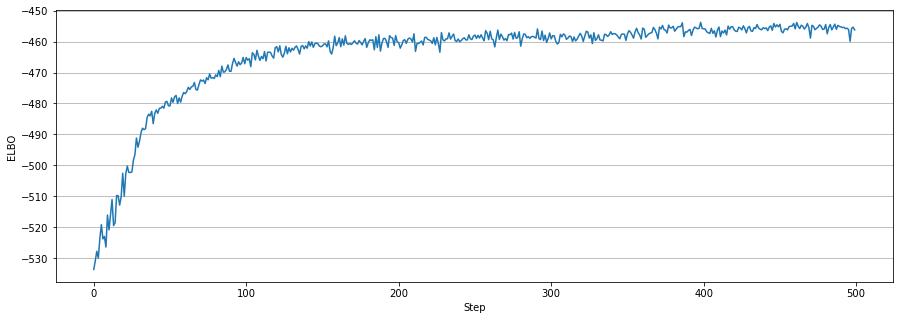

In [16]:
plot_elbos(elbos, "figs/p4_elbos.png")

In [18]:
np.save("data/p4_W0.npy", samples['W0'])
np.save("data/p4_b0.npy", samples['b0'])
np.save("data/p4_W1.npy", samples['W1'])
np.save("data/p4_b1.npy", samples['b1'])

# Program 5